# Hypothesis Testing

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
pima_indians_diabetes_db = pd.read_csv("diabetes.csv")

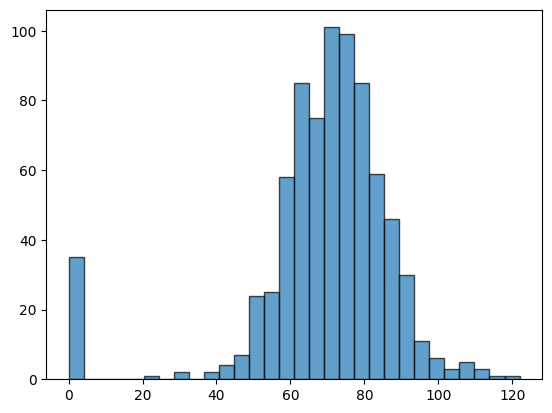

In [125]:
plt.hist(blood_pressure_series, bins = 30, alpha = 0.7, edgecolor = 'black')
plt.show()

In [131]:
blood_pressure_series = pima_indians_diabetes_db['BloodPressure']
population_mean = blood_pressure_series.mean()
population_std = blood_pressure_series.std()
print(f"""
    Actual Population mean = {population_mean}.
    We shall now test whether hypothesis testing outputs plausible
    results according to the actual population mean
    """)
#generate a random sample from the population of size 50
dataset = blood_pressure_series.sample(n = 50, replace = True) # sample size = 50



    Actual Population mean = 69.10546875.
    We shall now test whether hypothesis testing outputs plausible
    results according to the actual population mean
    


In [126]:
def z_hypothesis_test(dataset, significance_level, population_mean, population_std, test_type = 'two'):
    """
    Function to perform hypothesis test using z-values.
    Parameters:
        dataset (pandas.Series) -> sampled dataset of the total population
        siginificance_level (int) -> probability of type 1 error
        population_mean (int) -> the mean of the total population
        population_std (int) -> the standard deviation of the total population
        test_type (str) -> the kind of hypothesis test you want to perform, two tailed or one-tailed specified by
                            'two' to perform two test
                            'one_left' to perform one tailed test for lesser value
                            'one_right' to perform one tailed test for greater value
    Returns:
        prints the result of whether the null hypothesis is accepted or rejected
    """
    dataset_mean = dataset.mean()
    if test_type == 'two':
        print(f'''The sampled dataset mean = {dataset_mean}\n
        Null Hypothesis (H0): The population mean == The sample mean ({dataset_mean})\n
        Alternate Hypothesis (H1): The population mean != The sample mean({dataset_mean})
        ''')
        z_critical = abs(stats.norm.ppf(significance_level/2))
        z_statistics = (dataset.mean() - population_mean) / (population_std/math.sqrt(len(dataset)))
        print(f"Value of Z critical: {z_critical}\nCalculated Z value: {z_statistics}")
        if z_statistics > z_critical or z_statistics < -z_critical:
            print("Reject Null Hypothesis")
        else:
            print("Accept Null Hypothesis")
    elif test_type == 'one_left':
        print(f'''The sampled dataset mean = {dataset.mean()}\n
        Null Hypothesis (H0): The population mean == The sample mean ({dataset_mean})\n
        Alternate Hypothesis (H1): The population mean < The sample mean({dataset_mean})
        ''')
        z_critical = abs(stats.norm.ppf(significance_level))
        z_statistics = (dataset.mean() - population_mean) / (population_std/math.sqrt(len(dataset)))
        print(f"Value of Z critical: {z_critical}\nCalculated Z value: {z_statistics}")
        if z_statistics < -z_critical:
            print("Reject Null Hypothesis")
        else:
            print("Accept Null Hypothesis")
    elif test_type == 'one_right':
        print(f'''The sampled dataset mean = {dataset_mean}\n
        Null Hypothesis (H0): The population mean == The sample mean ({dataset_mean})\n
        Alternate Hypothesis (H1): The population mean > The sample mean({dataset_mean})
        ''')
        z_critical = abs(stats.norm.ppf(significance_level))
        z_statistics = (dataset.mean() - population_mean) / (population_std/math.sqrt(len(dataset)))
        print(f"Value of Z critical: {z_critical}\nCalculated Z value: {z_statistics}")
        if z_statistics > z_critical:
            print("Reject Null Hypothesis")
        else:
            print("Accept Null Hypothesis")
    else:
        raise Exception("Unknown test_type. Pick 'two', 'one_left' or 'one_right'")

In [128]:
z_hypothesis_test(dataset=dataset, significance_level=0.05, population_mean=population_mean,
                 population_std = population_std, test_type='one_left')

The sampled dataset mean = 67.58

        Null Hypothesis (H0): The population mean == The sample mean (67.58)

        Alternate Hypothesis (H1): The population mean < The sample mean(67.58)
        
Value of Z critical: 1.6448536269514729
Calculated Z value: -0.5572845855010835
Accept Null Hypothesis


In [120]:
def t_hypothesis_test(dataset, significance_level, population_mean, population_std, test_type = 'two'):
    """
    Function to perform hypothesis test using z-values.
    Parameters:
        dataset (pandas.Series) -> sampled dataset of the total population
        siginificance_level (int) -> probability of type 1 error
        population_mean (int) -> the mean of the total population
        population_std (int) -> the standard deviation of the total population
        test_type (str) -> the kind of hypothesis test you want to perform, two tailed or one-tailed specified by
                            'two' to perform two test
                            'one_left' to perform one tailed test for lesser value
                            'one_right' to perform one tailed test for greater value
    Returns:
        prints the result of whether the null hypothesis is accepted or rejected
    """
    if test_type == 'two':
        print(f'''The sampled dataset mean = {dataset_mean}\n
        Null Hypothesis (H0): The population mean == The sample mean ({dataset_mean})\n
        Alternate Hypothesis (H1): The population mean != The sample mean({dataset_mean})
        ''')
        sample_std = 0
        s = 0
        for i in dataset:
            s += (i-dataset_mean)**2
        sample_std = math.sqrt(s/(len(dataset) - 1)) # n-1 is used while calculating standard deviation for sample to account for the variance of the data
        t_statistics = (dataset_mean - population_mean) / (sample_std / math.sqrt(len(dataset)))
        t_critical = abs(stats.t.ppf(q=significance_level/2,df=len(dataset) - 1)) # q = significance_level / 2 because it is a two-tailed test
        print(f"Value of t critical: {t_critical}\nCalculated t value: {t_statistics}")
        if t_statistics > t_critical or t_statistics < -t_critical:
            print("Reject Null Hypothesis")
        else:
            print("Accept Null Hypothesis")
    elif test_type == 'one_left':
        print(f'''The sampled dataset mean = {dataset_mean}\n
        Null Hypothesis (H0): The population mean == The sample mean ({dataset_mean})\n
        Alternate Hypothesis (H1): The population mean < The sample mean({dataset_mean})
        ''')
        sample_std = 0
        s = 0
        for i in dataset:
            s += (i-dataset_mean)**2
        sample_std = math.sqrt(s/(len(dataset) - 1)) # n-1 is used while calculating standard deviation for sample to account for the variance of the data
        t_statistics = (dataset_mean - population_mean) / (sample_std / math.sqrt(len(dataset)))
        t_critical = abs(stats.t.ppf(q=significance_level, df=len(dataset) - 1))  # q = significance_level / 2 because it is a two-tailed test
        print(f"Value of t critical: {t_critical}\nCalculated t value: {t_statistics}")
        if z_statistics < -z_critical:
            print("Reject Null Hypothesis")
        else:
            print("Accept Null Hypothesis")
    elif test_type == 'one_right':
        print(f'''The sampled dataset mean = {dataset_mean}\n
        Null Hypothesis (H0): The population mean == The sample mean ({dataset_mean})\n
        Alternate Hypothesis (H1): The population mean > The sample mean({dataset_mean})
        ''')
        sample_std = 0
        s = 0
        for i in dataset:
            s += (i-dataset_mean)**2
        sample_std = math.sqrt(s/(len(dataset) - 1)) # n-1 is used while calculating standard deviation for sample to account for the variance of the data
        t_statistics = (dataset_mean - population_mean) / (sample_std / math.sqrt(len(dataset)))
        t_critical = abs(stats.t.ppf(q=significance_level, df=len(dataset) - 1))  # q = significance_level / 2 because it is a two-tailed test
        print(f"Value of t critical: {t_critical}\nCalculated t value: {t_statistics}")
        if z_statistics < -z_critical:
            print("Reject Null Hypothesis")
        else:
            print("Accept Null Hypothesis")
    else:
        raise Exception("Unknown test_type. Pick 'two', 'one_left' or 'one_right'")

In [121]:
t_hypothesis_test(dataset=dataset, significance_level=0.05, population_mean=population_mean,
                 population_std = population_std, test_type='one_right')

The sampled dataset mean = 72.44

        Null Hypothesis (H0): The population mean == The sample mean (72.44)

        Alternate Hypothesis (H1): The population mean > The sample mean(72.44)
        
Value of t critical: 1.6765508919142635
Calculated t value: 1.076371857857165
Accept Null Hypothesis
